# Web scraping with Python - class 02

### you will learn the basics of how to extract data from websites and visualize it using Python

### Python version

In [1]:
!python --version

Python 3.7.1


### What did we learn?
#### 1 - get data from a website
#### 2 - turn the messy raw data into something readable (Pandas data frame)
#### 3 - visualize the data and get basic statistics

### 1. Let's just put all we learned last class in one cell

https://coinmarketcap.com/all/views/all/
   #          Name Symbol       Market Cap      Price Circulating Supply  \
0  1   BTC Bitcoin    BTC  $68,107,029,030   $3878.39           17560625   
1  2  ETH Ethereum    ETH  $14,714,224,892    $140.10          105026828   
2  3       XRP XRP    XRP  $13,257,291,762  $0.320490   41,365,634,610 *   
3  4       EOS EOS    EOS   $3,208,813,387      $3.54      906,245,118 *   
4  5  LTC Litecoin    LTC   $2,784,601,710     $45.91           60653761   

     Volume (24h)   % 1h  % 24h    % 7d  \
0  $7,744,313,397  0.45%  0.77%  -2.14%   
1  $3,865,870,217  0.58%  1.46%  -3.63%   
2    $771,662,900  0.76%  0.01%  -2.22%   
3  $1,419,427,734  0.29%  0.85%  -4.65%   
4  $1,030,968,516  0.69%  0.54%  -6.95%   

                                         Unnamed: 10  
0  Add to Watchlist Remove from Watchlist Watchli...  
1  Add to Watchlist Remove from Watchlist Watchli...  
2  Add to Watchlist Remove from Watchlist Watchli...  
3  Add to Watchlist Rem

<IPython.core.display.Javascript object>


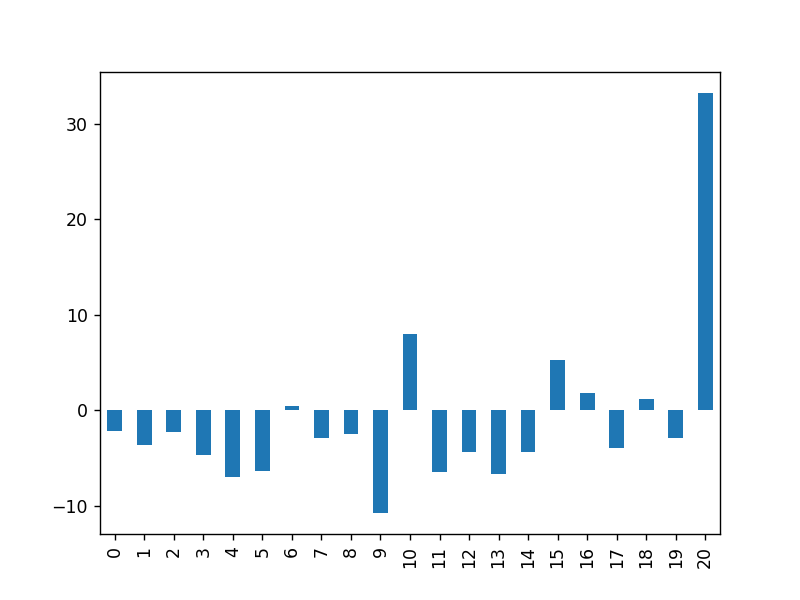

count    2070.000000
mean        2.396232
std        79.237220
min       -81.990000
25%       -13.490000
50%        -2.915000
75%         4.677500
max      2498.750000
Name: % 7d, dtype: float64


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

import requests
import re

from bs4 import BeautifulSoup
from bs4 import __version__ as bs4__version__ 

import pandas as pd

url  = 'https://coinmarketcap.com/all/views/all/' # remember we looked at crytocurrencies
print(url)

res  = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml') #The second argument 'lxml' is the html parser

table = soup.find_all('table')[0] 
df    = pd.read_html(str(table))[0]

print(df.head(5))

df['% 7d']   = df['% 7d'].map(lambda x: x.strip('?%')).apply(pd.to_numeric, errors='coerce')
df['% 7d'].loc[:20].plot.bar()

print(df['% 7d'].describe())

## Your turn!

### Let's search for housing price at http://newyork.craigslist.org/search/aap
### Try to find the highest, lowest and average price
#### create a new notebook named PythonTraining_ex01

### Tips
#### 1 - Explain in your own words the steps you need to follow to get what you want
#### 2 - A crucial thing in data analysis is to know the data you are manipulating
#### 3 - Start simple
#### 4 - Ask questions! (for me, your colleagues, Google, etc.!)

In [21]:
# %pastebin 1-2

'http://dpaste.com/39R0BFQ'

In [4]:
import numpy as np # Let's use numpy today

In [33]:
r    = requests.get("http://newyork.craigslist.org/search/aap")
r.raise_for_status()
soup = BeautifulSoup(r.text, 'html.parser')

In [34]:
print(soup)

﻿<!DOCTYPE html>

<html class="no-js"><head>
<title>new york all apartments  - craigslist</title>
<meta content="new york all apartments  - craigslist" name="description"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible">
<link href="https://newyork.craigslist.org/search/aap" rel="canonical"/>
<link href="https://newyork.craigslist.org/search/aap?format=rss" rel="alternate" title="RSS feed for craigslist | new york all apartments  - craigslist" type="application/rss+xml"/>
<link href="https://newyork.craigslist.org/search/aap?s=120" rel="next"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<link href="//www.craigslist.org/styles/cl.css?v=93aa8b9183682fd14ca12ff38c0d801c" media="all" rel="stylesheet" type="text/css"/>
<link href="//www.craigslist.org/styles/search.css?v=84cf86bc094026e12fa066bbbab154ac" media="all" rel="stylesheet" type="text/css"/>
<link href="//www.craigslist.org/styles/jquery-ui-clcustom.css?v=3b05ddffb7c7f5b62066deff2dda9339" media="all"

In [35]:
'''
<a class="result-image gallery" data-ids="1:00A0A_3bCfh3zJONO,1:00G0G_hPyvFFsuZXm,1:00h0h_d01Xmdkt8KM,1:00f0f_dwb77DgLaDi,1:00P0P_hq0ZFDV14VO,1:00B0B_jGqijmwY97B,1:00101_hCr3RwzfW6L,1:01616_5Apv3Wq6rbW,1:00303_j6gRXKDm0h2,1:00H0H_7k9az87g7ps,1:00p0p_2Wr1AjrNFph,1:00x0x_gbnttAE4MoD,1:00k0k_8xsUropnu5P,1:00303_i8JPgHq3Z6K,1:00404_bLJJNaBWtE5,1:01212_2w617F1yxnA" href="https://newyork.craigslist.org/brk/abo/d/brooklyn-elevator-building-literally/6829184978.html">
<span class="result-price">$2566</span>
</a>
'''

price_spans = soup.select("span.result-price")
print(len(price_spans))
print(type(price_spans))

236
<class 'list'>


In [36]:
print(price_spans)

[<span class="result-price">$2350</span>, <span class="result-price">$2350</span>, <span class="result-price">$2295</span>, <span class="result-price">$2295</span>, <span class="result-price">$2150</span>, <span class="result-price">$2150</span>, <span class="result-price">$3175</span>, <span class="result-price">$3175</span>, <span class="result-price">$1930</span>, <span class="result-price">$1930</span>, <span class="result-price">$2200</span>, <span class="result-price">$2200</span>, <span class="result-price">$1850</span>, <span class="result-price">$1850</span>, <span class="result-price">$2275</span>, <span class="result-price">$2275</span>, <span class="result-price">$2275</span>, <span class="result-price">$2275</span>, <span class="result-price">$2275</span>, <span class="result-price">$2275</span>, <span class="result-price">$2275</span>, <span class="result-price">$2275</span>, <span class="result-price">$1950</span>, <span class="result-price">$1950</span>, <span class="re

In [37]:
'''
We are in a hunt for numbers! You do NOT want bs4 element nor strings.
'''
print(price_spans[0])
print(price_spans[0].text)
print(price_spans[0].text[1:])
print(int(price_spans[0].text[1:]))

<span class="result-price">$2350</span>
$2350
2350
2350


In [38]:
'''
Let's get all prices and put in one list. We need to do LOOP!
'''
prices      = [int(span.text[1:]) for span in price_spans]
print(prices, len(prices))

[2350, 2350, 2295, 2295, 2150, 2150, 3175, 3175, 1930, 1930, 2200, 2200, 1850, 1850, 2275, 2275, 2275, 2275, 2275, 2275, 2275, 2275, 1950, 1950, 2700, 2700, 2275, 2275, 1700, 1700, 2275, 2275, 1500, 1500, 2275, 2275, 3900, 3900, 2275, 2275, 1000, 2350, 2350, 2250, 2250, 3700, 3700, 2375, 2375, 2400, 2400, 2695, 2695, 2995, 2995, 2400, 2400, 2350, 2350, 1665, 1665, 2600, 2600, 2750, 2750, 2800, 2800, 2795, 2795, 1665, 1665, 2975, 2975, 1900, 1900, 2299, 2299, 3800, 3800, 6200, 6200, 3942, 3942, 1125, 3200, 3200, 1850, 1850, 1600, 1600, 1500, 1500, 1825, 1825, 3296, 3296, 2345, 2345, 3460, 3460, 3275, 3275, 2595, 2595, 2045, 2045, 3935, 3935, 2995, 2995, 4995, 4995, 2400, 2400, 5495, 5495, 3200, 3200, 2400, 2400, 3025, 3025, 6995, 6995, 1952, 1952, 2700, 2215, 2215, 1995, 1995, 1800, 1800, 1550, 1550, 2384, 2384, 2695, 2695, 1825, 1825, 2200, 2200, 3775, 2613, 2613, 2250, 2250, 2250, 2250, 3500, 3500, 1550, 1550, 2989, 2989, 3700, 3700, 4400, 4400, 2135, 2135, 3600, 3600, 3295, 3295, 225

In [39]:
 print('Highest price: ${}'.format(max(prices)))
print('Lowest price: ${}'.format(min(prices)))
print('Average price: ${}'.format(sum(prices)/len(prices)))

Highest price: $7495
Lowest price: $1000
Average price: $2878.991525423729


<IPython.core.display.Javascript object>


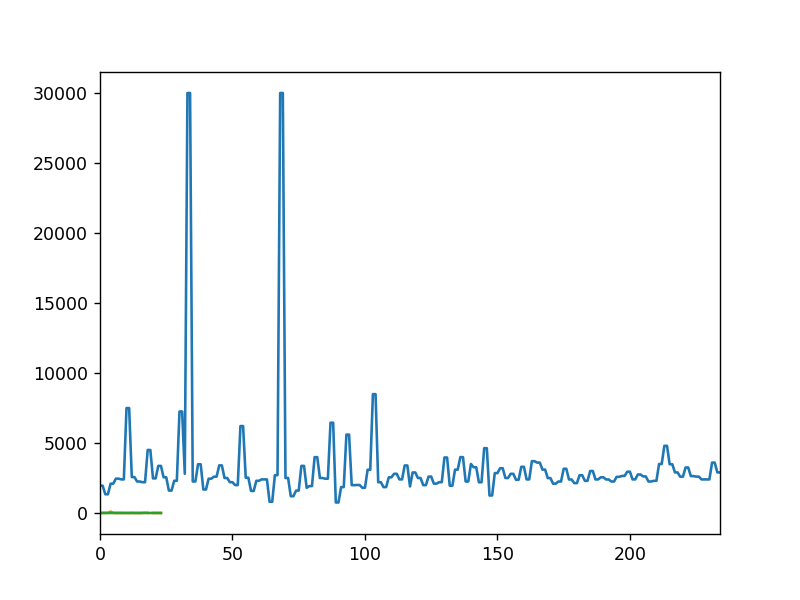

In [12]:
fig, ax = plt.subplots()
ax.plot(prices)

### Let's hunt for microcontrollers in Alibaba?

In [13]:
base_url = 'https://www.alibaba.com/trade/search?fsb=y&IndexArea=product_en&CatId=&SearchText='
query    = 'microcontroller'

r    = requests.get(base_url + query)
r.raise_for_status()
soup = BeautifulSoup(r.text, 'html.parser')

In [14]:
price_spans = soup.find_all("div", attrs={"price"})
print(len(price_spans))

price_mins, price_maxs = [], []
for span in price_spans:
    min_max_price = [float(x) for x in re.findall('\$(\d+\.\d+)', span.text)]
    if len(min_max_price)==1:
        min_max_price.append(np.nan)
    price_mins.append( min_max_price[0] )
    price_maxs.append( min_max_price[1] )

24


In [15]:
min_spans = soup.find_all("div", attrs={"min-order"})
print(len(min_spans))

min_order = []
for span in min_spans:
    min_order.append( re.findall('\d+', span.text)[0]  )

24


In [16]:
name_spans = soup.find_all("h2", attrs={"title"})
print(len(name_spans))

company_names = []
for name in name_spans:
    company_names.append(name.text.strip())


24


In [17]:
href_spans = soup.find_all("div", attrs={"stitle util-ellipsis"})
print(len(href_spans))

company_hrefs = []
for href in href_spans:
    company_hrefs.append( re.findall( 'href="([^"]*)"', str(href.find_all('a')) )[0].strip() ) 
    

24


In [18]:
df = pd.DataFrame(np.array([company_names, company_hrefs, min_order, price_mins, price_maxs]).T,
             columns=['product_details','company_site','moq','price_min','price_max'])

for k, v in df.iteritems():
    if str(k) in ['moq','price_min','price_max']:
        df[k] = pd.to_numeric(df[k], errors='coerce')
        
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)

df.style.format({'company_site': make_clickable})

,product_details,company_site,moq,price_min,price_max
0,(New Original) Microcontroller IC 8-Bit PIC16F628A-I/P PIC16F628A,//dobestchip.en.alibaba.com/company_profile.html#top-nav-bar,20,1.56,2.89
1,hot offer STR751FR1 microcontroller,//hongxingfan.en.alibaba.com/company_profile.html#top-nav-bar,1,0.1,10
2,Microcontrollers ATTINY10-TSHR,//icbond.en.alibaba.com/company_profile.html#top-nav-bar,1,0.05,9.65
3,Microcontroller Sensor Unos R3 Atmega16U2 AVR SMD Develop Board For Smart Watch Multimeter,//wq1108.en.alibaba.com/company_profile.html#top-nav-bar,10,3.2,3.6
4,"Components IC, integrated circuits opa111 , stm32f103ret6 32-bit microcontrollers",//hkorigin.en.alibaba.com/company_profile.html#top-nav-bar,5,0.1,99
5,New duino UNO R3 Development Board MEGA328P ATMEGA16U2 Microcontroller for Arduinos,//umean.en.alibaba.com/company_profile.html#top-nav-bar,1,4.8,5
6,NANO ATMEGA 328p atmega328 Microcontroller V3.0 ATMEGA328P Development Board,//logoele.en.alibaba.com/company_profile.html#top-nav-bar,5,2.16,2.7
7,ATMEGA32U4-AU ATMEGA32U4 QFP44 original Microcontroller,//hongxingfan.en.alibaba.com/company_profile.html#top-nav-bar,1,1.68,3.68
8,16-bit Microcontrollers - MCU MB96F346ASBPQC-GE2 MB96F346,//keepintegrity.en.alibaba.com/company_profile.html#top-nav-bar,1,0.1,10
9,PIC16F1824-I/ML 8-bit Microcontrollers - MCU 7 KB Flash Microcontroller IC 256,//fchipsource.en.alibaba.com/company_profile.html#top-nav-bar,1,0.2,0.3


In [19]:
df.price_max.plot()
df.price_min.plot()

In [40]:
prices      = [int(span.text[1:]) for span in price_spans]
print(prices)

[2350, 2350, 2295, 2295, 2150, 2150, 3175, 3175, 1930, 1930, 2200, 2200, 1850, 1850, 2275, 2275, 2275, 2275, 2275, 2275, 2275, 2275, 1950, 1950, 2700, 2700, 2275, 2275, 1700, 1700, 2275, 2275, 1500, 1500, 2275, 2275, 3900, 3900, 2275, 2275, 1000, 2350, 2350, 2250, 2250, 3700, 3700, 2375, 2375, 2400, 2400, 2695, 2695, 2995, 2995, 2400, 2400, 2350, 2350, 1665, 1665, 2600, 2600, 2750, 2750, 2800, 2800, 2795, 2795, 1665, 1665, 2975, 2975, 1900, 1900, 2299, 2299, 3800, 3800, 6200, 6200, 3942, 3942, 1125, 3200, 3200, 1850, 1850, 1600, 1600, 1500, 1500, 1825, 1825, 3296, 3296, 2345, 2345, 3460, 3460, 3275, 3275, 2595, 2595, 2045, 2045, 3935, 3935, 2995, 2995, 4995, 4995, 2400, 2400, 5495, 5495, 3200, 3200, 2400, 2400, 3025, 3025, 6995, 6995, 1952, 1952, 2700, 2215, 2215, 1995, 1995, 1800, 1800, 1550, 1550, 2384, 2384, 2695, 2695, 1825, 1825, 2200, 2200, 3775, 2613, 2613, 2250, 2250, 2250, 2250, 3500, 3500, 1550, 1550, 2989, 2989, 3700, 3700, 4400, 4400, 2135, 2135, 3600, 3600, 3295, 3295, 225

In [43]:
price = []
for span in price_spans:
    price.append(int(span.text[1:]))
    
print(price)

[2350, 2350, 2295, 2295, 2150, 2150, 3175, 3175, 1930, 1930, 2200, 2200, 1850, 1850, 2275, 2275, 2275, 2275, 2275, 2275, 2275, 2275, 1950, 1950, 2700, 2700, 2275, 2275, 1700, 1700, 2275, 2275, 1500, 1500, 2275, 2275, 3900, 3900, 2275, 2275, 1000, 2350, 2350, 2250, 2250, 3700, 3700, 2375, 2375, 2400, 2400, 2695, 2695, 2995, 2995, 2400, 2400, 2350, 2350, 1665, 1665, 2600, 2600, 2750, 2750, 2800, 2800, 2795, 2795, 1665, 1665, 2975, 2975, 1900, 1900, 2299, 2299, 3800, 3800, 6200, 6200, 3942, 3942, 1125, 3200, 3200, 1850, 1850, 1600, 1600, 1500, 1500, 1825, 1825, 3296, 3296, 2345, 2345, 3460, 3460, 3275, 3275, 2595, 2595, 2045, 2045, 3935, 3935, 2995, 2995, 4995, 4995, 2400, 2400, 5495, 5495, 3200, 3200, 2400, 2400, 3025, 3025, 6995, 6995, 1952, 1952, 2700, 2215, 2215, 1995, 1995, 1800, 1800, 1550, 1550, 2384, 2384, 2695, 2695, 1825, 1825, 2200, 2200, 3775, 2613, 2613, 2250, 2250, 2250, 2250, 3500, 3500, 1550, 1550, 2989, 2989, 3700, 3700, 4400, 4400, 2135, 2135, 3600, 3600, 3295, 3295, 225